## Part I: Decision trees


Here, we will use decision trees for classification of Iris species (Setosa, Versicolor, Virginica). Use random_state=0 for splitting and building all models.

#### 1) Fit decision tree with maximum depth (max_depth) of 2 and the default gini index for building the tree. Find the classification accuracy. (3pts)


- To visualize the tree (optional), first, import the graphviz package from terminal using the following:

        brew install graphviz

        OR

        #conda install -c anaconda graphviz  
        #conda install -c anaconda python-graphviz 

    Then, we can use the package to visulaize the decision tree as follows: 
        
        from sklearn.tree import export_graphviz
        import graphviz 
        
         dot_data=export_graphviz(FittedTreeModel,class_names=iris_dataset.target_names,   feature_names=iris_dataset.feature_names,out_file=None)
        
       graph = graphviz.Source(dot_data)  
       graph 



Accuracy:  0.8947368421052632


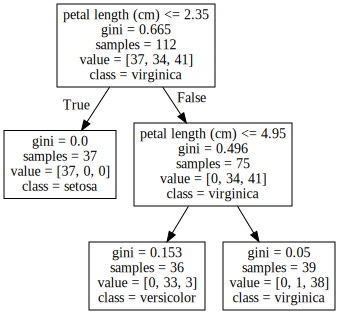

In [1]:

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
import graphviz

iris_dataset = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
treeModel = DecisionTreeClassifier(max_depth=2, criterion='gini')
treeModel.fit(X_train, Y_train)
print('Accuracy: ', treeModel.score(X_test, Y_test))

dot_data = export_graphviz(treeModel, class_names=iris_dataset.target_names,
                           feature_names=iris_dataset.feature_names, out_file=None)

graph = graphviz.Source(dot_data)
graph

#### 2) Use random forests to classify the Iris species. The random forests combines 4 decision trees, each of maximum depth 2 and maximum number of features considered at each split is 2. What is the model accuracy? (3pts)



In [2]:
forestModel = RandomForestClassifier(n_estimators=4, max_features=2, max_depth=2, random_state=0)
forestModel.fit(X_train, Y_train)
print('Accuracy', forestModel.score(X_test, Y_test))

Accuracy 0.9473684210526315


#### 3) Use AdaBoost with 4 decision tree models to perform the classification of the Iris species. What is the model accuracy? Comment on results. (3pts)


In [3]:
BoostModel = AdaBoostClassifier(n_estimators=4)
BoostModel.fit(X_train, Y_train)
print('Accuracy', BoostModel.score(X_test, Y_test))

Accuracy 0.9736842105263158


**Comment:**

Compare all these 3 models, the AdaBoost model has the highest accuracy and the Decision tree model has the lowest accuracy.

Overall, combining trees have higher accuracy in this case.

## Part II: Neural networks

#### Apply Neural networks (multilayer perceptron) to classify the Iris species, Build a model that has two hidden layers, the first layer has 10 neurons and second layer has 5 neurons. Use 'tanh' activation function, and set the regularization parameter alpha=0.5. Scale the feautures with MinMaxScaler. Try the following settings (a)-(c) and report the accuracy, then comment on the results.

a) Use gradient descent to solve the optimization  problem (i.e. get the weights), and choose random_state=0 (which corresponds to a particular initialization of weight values), and set max_iter=5000. Print the test accuracy. (3pts)
   
b) Repeat (a) above but with a model that uses random_state=10 to initialize the weights. Print the test accuracy. (2pts)
    
    
c) Repeat (b) but with model that use L-BFGS (a numerical quasi-Newton method of optimization) instead of stochastic gradient descent to find the weights. Print the test accuracy (3pts)
    
d) Comment on results (3pts)

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neural_network import MLPClassifier

scaler = MinMaxScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

MLPmodel = MLPClassifier(solver='sgd', activation='tanh', random_state=0,
                         hidden_layer_sizes=[10, 5], alpha=0.5, max_iter=5000)
MLPmodel.fit(X_train_transformed, Y_train)
print('(a) Accuracy:', MLPmodel.score(X_test_transformed, Y_test))

MLPmodel = MLPClassifier(solver='sgd', activation='tanh', random_state=10,
                         hidden_layer_sizes=[10, 5], alpha=0.5, max_iter=5000)
MLPmodel.fit(X_train_transformed, Y_train)
print('(b) Accuracy:', MLPmodel.score(X_test_transformed, Y_test))

MLPmodel = MLPClassifier(solver='lbfgs', activation='tanh', random_state=10,
                         hidden_layer_sizes=[10, 5], alpha=0.5, max_iter=5000)
MLPmodel.fit(X_train_transformed, Y_train)
print('(c) Accuracy:', MLPmodel.score(X_test_transformed, Y_test))

(a) Accuracy: 0.9473684210526315
(b) Accuracy: 0.9210526315789473
(c) Accuracy: 0.9736842105263158


**Comment:**

1. The random state affects the result to some extent.

2. The model that use L-BFGS has a better performance than the model which uses stochastic gradient descent in this case.